#  **ICT303 - Assignment 2**

**Your name: Caleb Goss**

**Student ID: 34090158**

**Email: cjmeepers@gmail.com**

In this assignment, you will build and train a deep learning model for solving a problem of your choice.


You are required to:
- Think of a practical problem that you would like to solve. The problem can be related, but not limted to, object detection and recognition from images, text analysis, speech analysis, image unpainting, converting images to artistic painting, action recognition (from images or videos), image to text (i.e., generating textual description for images or videos), or text to image (generating images from text) etc.,
- Find an appropriate data set to train and test the model you will develop. Note that the dataset should contain enough data (with groundtruth labels) so that when used for training, the model can generalize well to unseen data.
- Design a neural network that will solve the problem
- Train the neural network on your training data and then evaluate its performance on test data
- Analyze the performance of the network you developed and discuss its limitations.

**What to submit:**
- A colab notebook that describes:
 - The problem you would like to solve **[10 Marks]**
 - The dataset that you will use to train and test the deep learning model that you will develop **[10 marks]**
 - A diagram that describes the architecture of the neural network that you developed **[10 marks]**
 - Performance curves - this is includes the loss curves as well as the accuracy **[10 marks]**
 - A discussion, analysis and justification of the different choices you made and their effect on the performance **[15 marks]**
 - A discussion, analysis of the limitations of your method. You can also show failure cases and try to understand why did it fail on these cases **[15 marks]**

- Source code that runs - this includes both code for training and testing **[30 marks]**

You also need to submit the dataset you used for training and testing, or alternatively provide the code that downloads the data.

Make sure you reference all sources from which you took information.

You are allowed to use existing neural networks (not required to implement them from scratch). But, you must customize the architecture to the problem you want to solve.


### ***I've wasted TOO much time tweaking parameters***

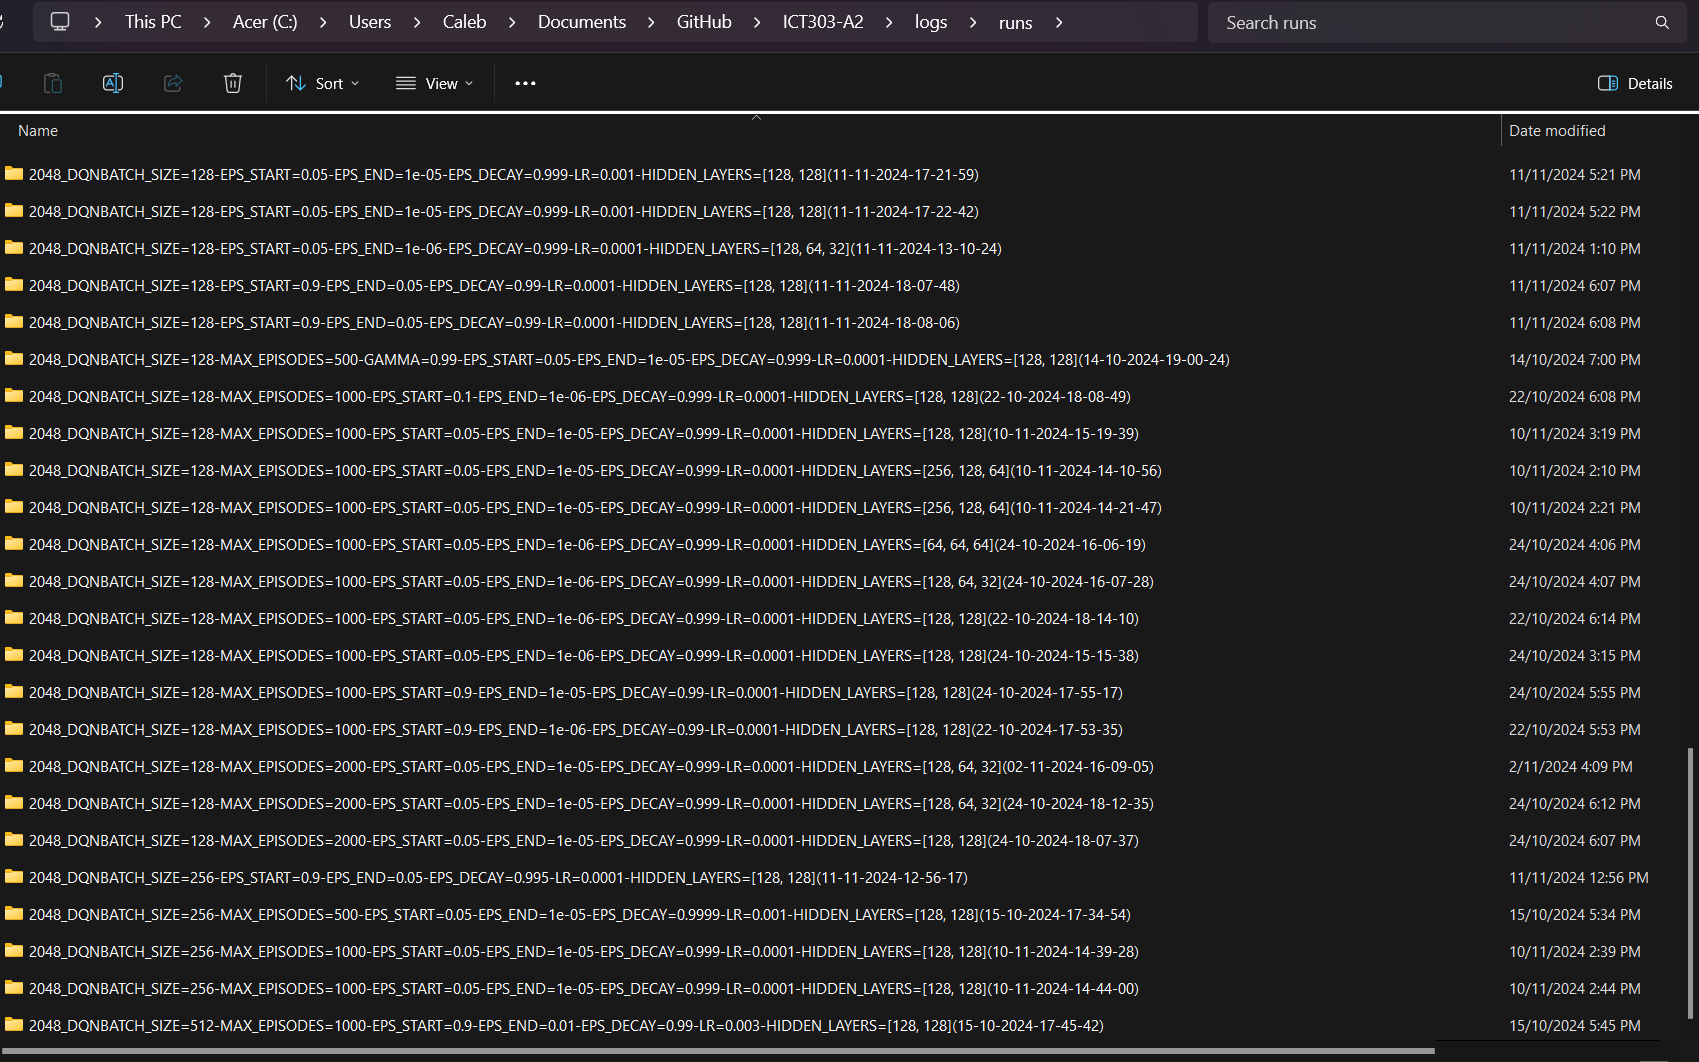

## **Training an AI to Master 2048: A Deep Q-Learning Approach**

### **Problem Description [10 marks]**


- **Problem:** 2048 is a sliding tile puzzle game played on a 4x4 grid.

- **How to Play:** Combine matching number tiles by sliding them in four possible directions (up, down, left, right).

- **Objective:** Reach the 2048 tile.

##### *Why 2048 is an Interesting AI Problem*

*The game seems simple at first, but can prove challenging to reach the 2048 tile for these reasons:*

1. **Complex Decision Making**
    - Each move can affect possibilities many moves later
    - What looks like a good move now might lead to game-ending situations
    - Players need to maintain organized patterns while adapting to random elements

2. **Challenging Learning Environment**
    - The 4x4 grid has 4^16 possible states
    - Random tile spawns make planning difficult
    - Success requires both short-term tactics and a long-term strategy
    - Mistakes early in the game might only become apparent much later

##### *Why Deep Q-Learning?*

*After considering various approaches, I chose Deep Q-Learning (DQN) for the following reasons:*

1. **Natural Fit for the Problem**
    - Can handle the continuous state space of the board
    - Works well with discrete actions (up, down, left, right)
    - Can learn complex patterns through experience

2. **Learning from Experience**
    - Similar to how humans learn the game
    - Improves through trial and error
    - Can discover strategies we might not think of

3. **Balanced Learning Approach**
    - Explores new strategies while exploiting learned patterns
    - Can handle delayed rewards (important for 2048)

### **Dataset/Environment [10 marks]**

Unlike traditional machine learning problems, where we start with a dataset, reinforcement learning creates its dataset through an agent's interactions with its environment.

#### *State Representation: Making the Game Board Learnable*

One of the most crucial decisions was how to represent the game board to the AI.

```python
def get_state(self) -> np.ndarray:
    state = self._board().flatten()
    return np.log2(np.where(state > 0, state, 1)).astype(float)
```

*This code does the following to our state representation:*

1. **Flattening the Board**
    - Converts the 4x4 grid into a 16-element vector
    - Preserves all information while simplifying input
    - Makes it easier for the neural network to process

2. **Log2 Transformation**
    - Handles the exponential growth of tile values
    - 2048 becomes 11 instead of 2048 (2^11 = 2048)
    - Makes learning more stable by reducing value ranges

#### *Reward Design: Teaching the AI What Matters*

The reward system is crucial - it's how we tell the AI what "good" and "bad" moves look like.

```python
if valid_move:
    # Merge reward, use log2 to prevent reward explosion
    move_reward = np.log2(move_score) if move_score > 0 else 0

    # Reward for achieving new highest tile
    new_tile_reward = (np.log2(max_tile) - np.log2(prev_max_tile)
                        if max_tile > prev_max_tile else 0)

    # Add a small reward for empty spaces
    empty_spaces_reward = 0.1 * np.sum(self._board() == 0)

    # Reward is the sum of all previous rewards plus a small bonus for each step
    reward = move_reward + new_tile_reward + empty_spaces_reward + 0.1
else:
    # Penalize invalid moves
    reward = -2
```

*Each component serves a specific purpose:*

1. **Move Reward**
    - Encourages combining tiles
    - Logarithmic scaling prevents reward explosion
    - Immediate feedback for good moves

2. **New Tile Reward**
    - Bonus for reaching new tile values
    - Encourages progression towards 2048

3. **Empty Spaces Reward**
    - Promotes board management
    - Keeps options open for future moves

4. **Invalid Move Penalty**
    - Discourages trying impossible moves
    - Helps learn board boundaries
    - Encourages efficient play

### **Network Architecture [10 marks]**

The DQN network is what powers the AI decision-making process.

#### *Core Architecture*

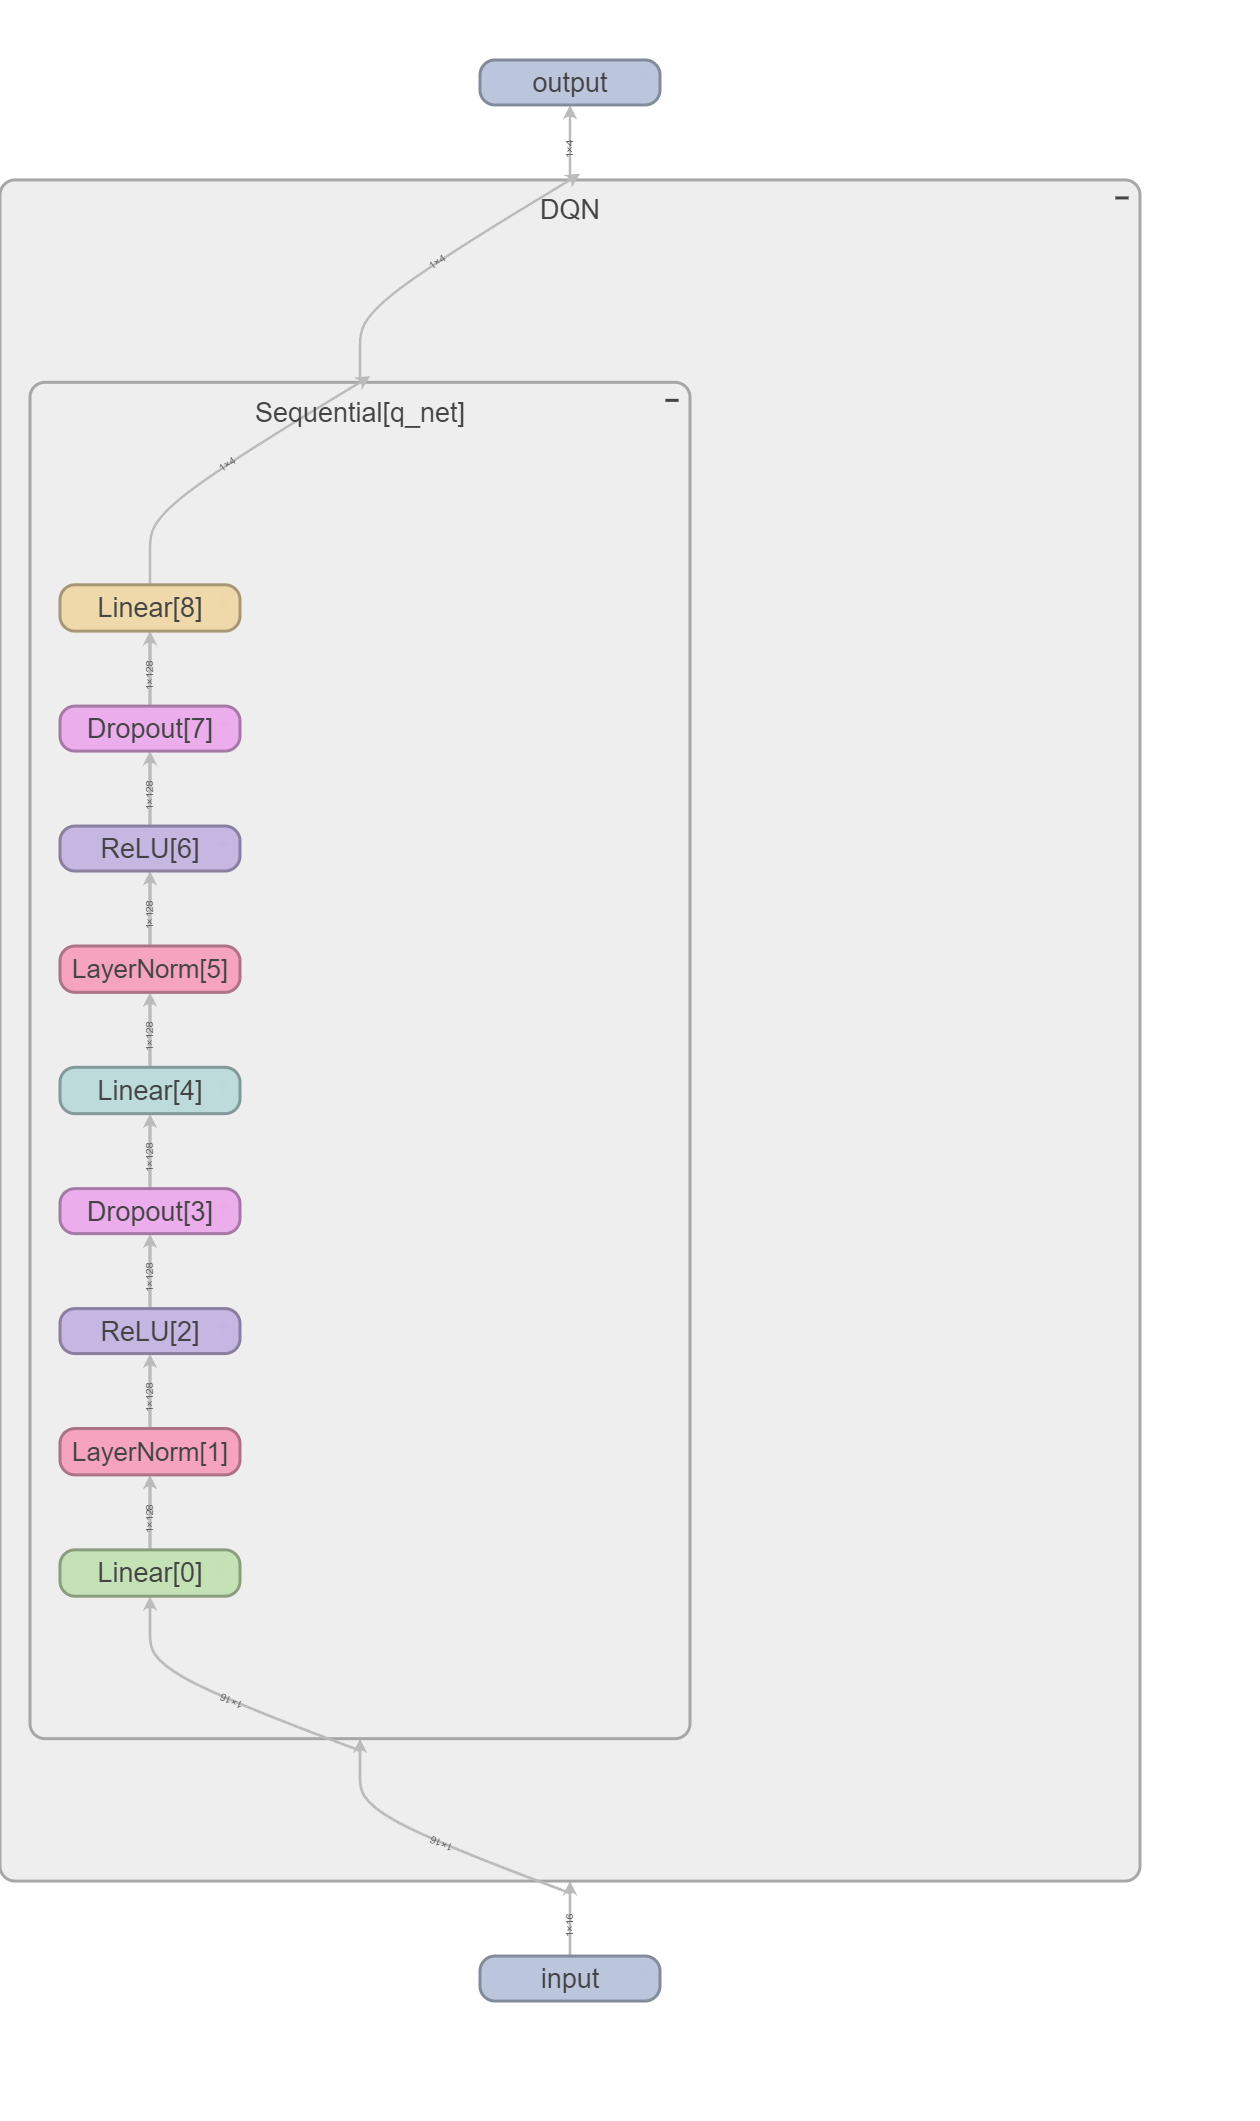

```python
class DQN(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            # First hidden layer
            nn.Linear(16, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(),

            # Second hidden layer
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(),

            # Output layer
            nn.Linear(128, 4)
        )
```

*Let's break down why each component matters:*

##### *Network Components*

1. **Input Layer** *(16 neurons)* 
    - Matches the flattened board size (4x4)
    - Each neuron represents one tile position
    - Log2-transformed values keep input ranges manageable

2. **2 Hidden Layers** *(128 neurons each)* 
    - Two layers provide depth without complexity
    - 128 neurons offer enough capacity for pattern recognition
    - Consistent size maintains information flow

3. **Layer Normalization**
    - Stabalizes learning across different board states
    - Helps handle varying tile value ranges
    - Better than BatchNorm for RL cases (handles individual states better)

4. **ReLU Activation**
    - Fast, simple, and effective
    - Helps learn non-linear patterns
    - Prevents vanishing gradient problems

5. **Dropout**
    - Randomly deactivates neurons during training
    - Forces network to learn robust features
    - Prevents over-reliance on any single path
    - Adds noise and prevents co-adaptation (overfitting)

5. **Output Layer** *(4 neurons)* 
    - One Q-value for each possible move
    - No activation (raw Q-values)
    - Directly interpretable as action values

### **Performance Curves [10 marks]**

### **Design Decisions & Performance Impacts [15 marks]**

#### *Network Architecture*

- LayerNorm instead of BatchNorm
    - More stable training in reinforcement learning context
    - Better handles varying state distributions
- Dropouts for regularization
    - Prevents overfitting to specific board patterns

#### *Hyperparameters*

##### *Exploration Strategy*

- **Epsilon Start:** *0.1*
    - 10% initial exploration balances learning with competence

- **Epsilon End:** *0.001*
    - 0.1% final exploration maintains adaptability

- **Epsilon Decay:** *0.993*
    - Decay rate carefully calculated for 1000 episodes

##### *Memory & Batch Size*

- **Batch Size:** *128*
    - Large enough for stable gradient updates
    - Small enough for efficient computation
    - Common power of 2 size of GPU optimization
    
- **Buffer Size:** *100,000*
    - Games can be long (100s of moves)
    - Need enough diversity in experience
    - Stores roughly 500-1000 full games
    - Prevents overfitting to recent experiences

##### *Learning Rate & Updates*

- **Learning Rate:** *0.0001 (1e-4)*
    - Small enough for stable learning with the log-transformed reward scale
    - Handles random tile spawns with overreacting
    - Pairs well with the DQN LayerNorm + Dropout Architecture

- **Evaluation Frequency:** *50 episodes*
    - Regular checkpoints of progress
    - Not too computationally expensive
    - Enough episodes to see trends
    - Good interval for saving models

- **Update Frequency:** *5 episodes*
    - Balances between learning stability and speed
    - Matches the average game length (~200-400 moves)
    - Works well with 1e-4 LR as policy changes are gradual

##### *Training & Evaluation Episodes*

- **Train Episodes:** *1000 episodes*
    - Enough episodes to learn basic strategies
    - Allows for exploration decay
    - Can see clear learning trends
    - Reasonable training time (10 - 20 minutes)
- **Evaluation Episodes:** *20 episodes*
    - Enough episodes to account for randomness
    - Quick enough for frequent evaluation
    - Good balance of accuracy vs time

### **Discussion & Analysis of Limitations [15 marks]**

help

### **Source Code [30 marks]**

#### *Add Imports*

In [6]:
%pip install tensorboardX

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from typing import Any
from tensorboardX import SummaryWriter
from torch import nn

import torch
import random
import numpy as np

#### *Add Utility Functions & Global Variables*

In [24]:
import os
from pathlib import Path

import os
import datetime

ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

ACTION_SET = (ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT)
ACTION_NAMES = {ACTION_UP: "up", ACTION_DOWN: "down", ACTION_LEFT: "left", ACTION_RIGHT: "right"}

BASE_DIR = os.path.abspath(os.getcwd())
ASSETS_DIR = os.path.abspath(os.path.join(BASE_DIR, "assets"))
LOGS_DIR = os.path.abspath(os.path.join(BASE_DIR, "logs"))
MODELS_DIR = os.path.abspath(os.path.join(ASSETS_DIR, "models"))
CHECKPOINTS_DIR = os.path.abspath(os.path.join(MODELS_DIR, "checkpoints"))
DATA_DIR = os.path.abspath(os.path.join(ASSETS_DIR, "data"))

# Ensure necessary directories exist
os.makedirs(ASSETS_DIR, exist_ok=True)
os.makedirs(LOGS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

def file_exists(filepath: str) -> bool:
    return os.path.isfile(filepath)


def directory_exists(file_dir: str) -> bool:
    return os.path.isdir(file_dir)


def join_path(src: str, dst: str) -> str:
    return os.path.join(src, dst)


def list_files(file_dir: str):
    path = Path(file_dir)

    return [str(file) for file in path.rglob("*") if file.is_file()]


def get_log_path(log_dir: str, name: str, hyperparams: dict) -> str:
    base_dir = join_path(log_dir, "runs")
    time_str = datetime.datetime.now().strftime("%d-%m-%Y-%H-%M-%S")

    # Create the params string
    params = "-".join(f"{key}={value}" for key, value in hyperparams.items())

    run_id = f"{name}{params}({time_str})"

    return join_path(base_dir, run_id)


#### **AI Source Code**

##### *Adjust Hyperparameters as necessary*

In [ ]:
HYPERPARAMETERS: dict = {
    "BATCH_SIZE": 128,
    "EPS_START": 0.5,
    "EPS_END": 0.05,
    "EPS_DECAY": 0.998,
    "LR": 1e-4,
    "HIDDEN_LAYERS": [128, 128, 128, 128]
}

##### *Add Utility Functions*

In [13]:
from typing import Any
from torch import cuda, save, load

def check_cuda() -> None:
    if cuda.is_available():
        print("CUDA is available")
        print(f"CUDA device count: {cuda.device_count()}")
        print(f"Current CUDA device: {cuda.current_device()}")
        print(f"CUDA device name: {cuda.get_device_name(0)}\n")
    else:
        print("CUDA is not available, using CPU\n")
        
        
def save_checkpoint(checkpoint: dict, path: str) -> None:
    """Save model state dict and training info"""
    save(checkpoint, path)
    
def load_checkpoint(path: str) -> Any:
    """Load saved model"""
    return load(path, map_location="cpu")

##### *Add DQN Model*

In [14]:
class DQN(nn.Module):
    def __init__(self, input_size: int, output_size: int, hidden_layers: list[int]):
        super(DQN, self).__init__()
        
        # Board size is 4x4 
        
        # Possible tile values (0, 2, 4, 8, 
        #                       16, 32, 64, 128, 256, 512,
        #                       1024, 2048, 4096, 8192, 
        #                       16384, 32768)
        
        # Log2 (2^x) = (0, (0), 1 (2), 2 (4), 3 (8), 4 (16), 5 (32), 6 (64)
        #               7 (128), 8 (256), 9 (512), 
        #               10 (1024), 11 (2048), 12 (4096), 
        #               13 (8192), 14 (16384), 15 (32768))

        self.q_net = self.create_network(input_size, output_size, hidden_layers)

    def create_network(
        self, input_size: int, output_size: int, hidden_layers: list[int]
    ):
        layers = []
        in_features = input_size
        
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(in_features, hidden_size))
            layers.append(nn.LayerNorm(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout())

            in_features = hidden_size

        # Output layer
        layers.append(nn.Linear(in_features, output_size))

        return nn.Sequential(*layers)

    def forward(self, X):
        return self.q_net(X)

##### *Add Replay Memory Buffer*

In [15]:
from collections import namedtuple, deque

Transition = namedtuple(
    "Transition", ("state", "action", "next_state", "reward", "done")
)


class ReplayMemory:
    def __init__(self, capacity: int):
        self.capacity = capacity
        self.memory = deque([], maxlen=self.capacity)

    def push(self, *args):
        self.memory.append(Transition(*args))

    def sample(self, batch_size: int):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

##### *Add DQN Agent*

In [16]:
from torch import optim

Action = int

BATCH_SIZE = HYPERPARAMETERS.get("BATCH_SIZE", 128)
MEMORY_CAPACITY = HYPERPARAMETERS.get("BUFFER_SIZE", 100_000)
GAMMA = HYPERPARAMETERS.get("GAMMA", 0.99)
LEARNING_RATE = HYPERPARAMETERS.get("LEARNING_RATE", 1e-4)
HIDDEN_LAYERS = HYPERPARAMETERS.get("HIDDEN_LAYERS", [128, 128])

class DQNAgent:
    def __init__(
        self,
        size: int,
        device="cuda" if torch.cuda.is_available() else "cpu"
    ):
        self.state_size = size * size
        self.action_size = 4
        
        self.device = device
        
        # Initialize replay memory and hyperparameters
        self.memory = ReplayMemory(MEMORY_CAPACITY)
        self.batch_size = BATCH_SIZE
        self.gamma = GAMMA # Discount factor
        self.lr = LEARNING_RATE
        
        # Initialize policy and target networks
        self.policy_net = DQN(self.state_size, self.action_size, HIDDEN_LAYERS).to(device)
        self.target_net = DQN(self.state_size, self.action_size, HIDDEN_LAYERS).to(device)
        
        # Copy policy network weights to target network
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()
        
        # Initialize optimizer and loss function
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=self.lr)
        self.criterion = nn.SmoothL1Loss() # Huber loss
        
    def act(self, state: np.ndarray, epsilon: float, valid_actions: list[int], eval: bool = True):
        """
        Select an action using epsilon-greedy policy
        
        Args:
            state: Current game state as numpy array
            epsilon: Exploration rate (0-1)
            valid_actions: List of valid actions at current state
            eval: If True, keeps network in eval mode (for evaluation/testing)
        """
        
        # Exploration: randomly sample from valid actions with probability epsilon
        if random.random() < epsilon:
            return random.choice(valid_actions)
        
        # Exploitation: Use policy network to select best action
        
        # Convert state to tensor and add batch dimension
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        
        # Disable dropout for prediction
        self.policy_net.eval()
        
        # Get Q-values without computing gradients
        with torch.no_grad():
            q_values = self.policy_net(state)
         
        # Mask invalid actions by only considering Q-values of valid actions
        valid_q_values = q_values[0][valid_actions]
        
        # Select highest Q-value action
        best_action_idx = valid_q_values.argmax().item()
        
        # Map back to original action space
        best_action = valid_actions[best_action_idx]
        
        # Return to training mode if not in evaluation
        if not eval:
            self.policy_net.train()
    
        return best_action
            
    def optimize_model(self) -> float:
        """
        Perform one step of optimization on the DQN
        Returns the loss value
        """
        if len(self.memory) < self.batch_size:
            return 0.0
        
        # Sample and prepare batch from memory buffer
        transitions = self.memory.sample(self.batch_size)
        batch = Transition(*zip(*transitions))
        
        # Create tensors for 
        state_batch = torch.from_numpy(np.stack(batch.state)).float().to(self.device)
        action_batch = torch.tensor(batch.action).long().to(self.device)
        reward_batch = torch.tensor(batch.reward).float().to(self.device)
        next_state_batch = torch.from_numpy(np.stack(batch.next_state)).float().to(self.device)
        done_batch = torch.tensor(batch.done).float().to(self.device)
        
        # Reset gradients
        self.optimizer.zero_grad()
        
        # Current Q-values
        q_values = self.policy_net(state_batch).gather(1, action_batch.unsqueeze(1))
        
        # Next state Q-values (following Bellman equation)
        with torch.no_grad():
            next_q_values = self.target_net(next_state_batch).max(1)[0]
        
        # Expected Q-values: R + γ * max(Q(s', a')) * (1 - done)
        expected_q_values = reward_batch + (self.gamma * next_q_values * (1 - done_batch))
            
        # Compute loss and optimize
        loss = self.criterion(q_values, expected_q_values.unsqueeze(1))
        
        loss.backward()        
        self.optimizer.step()
        
        return loss.item()
    
    def update_target_network(self):
        """Update the target network with the policy network's weights"""
        self.target_net.load_state_dict(self.policy_net.state_dict())

##### *Add Training Module*

In [17]:
from tqdm import tqdm
from collections import defaultdict

%load_ext tensorboard

TRAIN_EPISODES = HYPERPARAMETERS.get("TRAIN_EPISODES", 1000)
EVAL_EPISODES = HYPERPARAMETERS.get("EVAL_EPISODES", 20)

UPDATE_FREQUENCY = HYPERPARAMETERS.get("UPDATE_FREQ", 5)
EVAL_FREQUENCY = HYPERPARAMETERS.get("EVAL_FREQ", 50)

EPSILON_START = HYPERPARAMETERS.get("EPS_START", 0.9)
EPSILON_END = HYPERPARAMETERS.get("EPS_END", 0.05)
EPSILON_DECAY = HYPERPARAMETERS.get("EPS_DECAY", 0.99)

class Trainer:
    def __init__(self, env: Any, agent: DQNAgent, 
                 writer: SummaryWriter | None):
        self.env = env
        self.agent = agent
        self.writer = writer
        
        # self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.agent.optimizer)
        
        # Training hyperparameters
        self.train_episodes = TRAIN_EPISODES
        self.eval_episodes = EVAL_EPISODES
        self.update_frequency = UPDATE_FREQUENCY
        self.eval_frequency = EVAL_FREQUENCY
        
        # Epsilon hyperparameters
        self.epsilon_start = EPSILON_START
        self.epsilon_end = EPSILON_END
        self.epsilon_decay = EPSILON_DECAY
        self.epsilon = self.epsilon_start
        
        # Track best model
        self.best_score = float("-inf")
        

    def train(self):
        progress_bar = tqdm(range(self.train_episodes), desc="Training", leave=False)
        
        for episode in progress_bar:
            
            train_metrics = {
                "loss": 0,
                "steps": 0,
                "reward": 0,
                "score": 0,
                "max_tile": 0,
            }
            
            state = self.env.reset()
            done = False
            
            while not done:
                action = self.agent.act(state, self.epsilon, self.env.get_valid_actions(), eval=False)
                next_state, reward, done = self.env.step(action)
                
                self.agent.memory.push(state, action, next_state, reward, done)
                state = next_state
                
                # Perform one step of the optimization (on the policy network)
                train_metrics["loss"] += self.agent.optimize_model()
                train_metrics["steps"] += 1
                train_metrics["reward"] += reward
                    
            # Calculate averages and get final metrics
            train_metrics["loss"] /= max(train_metrics["steps"], 1)
            train_metrics["score"] = self.env.get_score()
            train_metrics["max_tile"] = self.env.get_max_tile()
            
            # Log training metrics
            self._log_metrics(episode, train_metrics, train=True)

            # Update epsilon
            self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)
            
            # Update target network
            if episode % self.update_frequency == 0:
                self.agent.update_target_network()
            
            if episode % self.eval_frequency == 0:
                eval_metrics = self.evaluate()
                self._log_metrics(episode, eval_metrics, train=False)
                
                if eval_metrics["avg_score"] > self.best_score:
                    self.best_score = eval_metrics["avg_score"]
                    self.save(join_path(CHECKPOINTS_DIR, f"checkpoint_{episode}.pth"))
                    
                # Update progress bar with both train and eval metrics
                progress_bar.set_postfix({
                    "train_reward": f"{train_metrics["reward"]:.2f}",
                    "eval_reward": f"{eval_metrics['avg_reward']:.2f}",
                    "max_tile": eval_metrics['avg_max_tile']
                })
            else:
                # Regular training progress
                progress_bar.set_postfix({"reward": f"{train_metrics["reward"]:.2f}", "loss": f"{train_metrics["loss"]:.2f}"})
                
            # Not using LR scheduler since it was having issues
            # self.scheduler.step(total_loss)
            
    def _log_metrics(self, episode: int, metrics: dict, train: bool) -> None:
        """Helper method to log metrics"""
        for name, value in metrics.items():
            if train:
                self.writer.add_scalar(f"Train/{name}", value, episode)
            else:
                self.writer.add_scalar(f"Eval/{name}", value, episode)
        
        if train:
            self.writer.add_scalar("Train/Epsilon", self.epsilon, episode)
    
    def evaluate(self):
        """
        Evaluate the current policy without exploration
        Returns the evaluation metrics dictionary
        """
        
        eval_metrics: dict = {
            "rewards": [],
            "max_tiles": [],
            "scores": [],
            "steps": [],
            "success_512": 0,
            "success_1024": 0,
            "success_2048": 0
        }
        
        progress_bar = tqdm(range(self.eval_episodes), desc="Evaluating", leave=False)
        
        for _ in progress_bar:
            state = self.env.reset()
            
            episode_reward = 0
            steps = 0
            done = False
            
            while not done:
                # No exploration during evaluation
                action = self.agent.act(state, epsilon=0, valid_actions=self.env.get_valid_actions())
                    
                next_state, reward, done = self.env.step(action)
                
                state = next_state
                episode_reward += reward
                steps += 1
                
            # Collect metrics
            max_tile = self.env.get_max_tile()
            score = self.env.get_score()
            
            eval_metrics["rewards"].append(episode_reward)
            eval_metrics["max_tiles"].append(max_tile)
            eval_metrics["scores"].append(score)
            eval_metrics["steps"].append(steps)
            
            # Track success rates
            if max_tile >= 512: eval_metrics["success_512"] += 1
            if max_tile >= 1024: eval_metrics["success_1024"] += 1
            if max_tile >= 2048: eval_metrics["success_2048"] += 1
            
            # Calculate averages
            metrics = {
                "avg_reward": np.mean(eval_metrics["rewards"]),
                "avg_max_tile": np.mean(eval_metrics["max_tiles"]),
                "avg_score": np.mean(eval_metrics["scores"]),
                "avg_steps": np.mean(eval_metrics["steps"]),
                "success_rate_512": float(eval_metrics["success_512"] / self.eval_episodes) * 100.0,
                "success_rate_1024": float(eval_metrics["success_1024"] / self.eval_episodes) * 100.0,
                "success_rate_2048": float(eval_metrics["success_2048"] / self.eval_episodes) * 100.0
            }
            
            return metrics
        
    def save(self, path: str):
        """Save model state dict and training info"""
        checkpoint = {
            "policy_state_dict": self.agent.policy_net.state_dict(),
            "target_state_dict": self.agent.target_net.state_dict(),
            "optimizer_state_dict": self.agent.optimizer.state_dict(),
            "epsilon": self.epsilon,
            "best_score": self.best_score
        }
        
        save_checkpoint(checkpoint, path)

##### *Add Testing Module*

In [18]:
def play_2048(env: Any, agent: DQNAgent, num_games: int = 5):
    
    best_score = float("-inf")
    
    checkpoint = None
    
    for filepath in list_files(CHECKPOINTS_DIR):
        cp = load_checkpoint(filepath)
        cp_best_score = cp["best_score"]
        
        if cp_best_score > best_score:
            best_score = cp_best_score
            checkpoint = cp
            
            print(f"Highest Score in checkpoint: {os.path.basename(filepath)}")
            print(f"Best Score: {cp_best_score:.2f}")
    
    agent.policy_net.load_state_dict(checkpoint["policy_state_dict"])
    agent.policy_net.eval()
    
    for game in range(num_games):
        state = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            # Select action with no exploration
            action = agent.act(state, epsilon=0, valid_actions=env.get_valid_actions())
            
            state, reward, done = env.step(action)
            total_reward += reward
        
            
        print(f"\nGame {game + 1} Summary:")
        env.render()
        print(f"Final Score: {env.get_score()}")
        print(f"Max Tile: {env.get_max_tile()}")
        print(f"Total Reward: {total_reward:.2f}")

#### **2048 Game Environment & Logic Source Code**

##### *Add 2048 Game Board*

In [19]:
class Board:
    def __init__(self, size=4):
        self.size = size
        self.board = np.zeros((self.size, self.size), dtype=int)

    def __getitem__(self, key):
        return self.board[key]

    def __setitem__(self, key, value):
        self.board[key] = value

    def get_board(self) -> np.ndarray:
        return self.board

    def set_board(self, board: np.ndarray):
        self.board = board

    def reset(self):
        self.board = np.zeros((self.size, self.size), dtype=int)

        self.spawn_tile()
        self.spawn_tile()

    # Add new tile to the board.
    def spawn_tile(self):
        # Find all empty cells in board
        empty_cells = np.argwhere(self.board == 0)

        # If there are empty cells on the board
        if empty_cells.size > 0:
            i, j = random.choice(empty_cells)
            self.board[i, j] = 2 if random.random() < 0.9 else 4

    def __str__(self):
        return "\n".join(
            [" ".join([f"{tile:4}" for tile in row]) for row in self.board]
        )

##### *Add 2048 Game Board Logic*

In [20]:
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

ACTION_SET = (ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT)

class BoardLogic:
    @staticmethod
    def move(board: np.ndarray, action: int) -> tuple[np.ndarray, bool, int]:
        """
        Perform a move on the board.

        Args:
            board (np.ndarray): The current game board.
            action (int): The action to perform (UP, DOWN, LEFT, RIGHT).

        Returns:
            Tuple[np.ndarray, bool, int]: New board state, whether move was valid, and score.
        """
        prev_board = board.copy()
        new_board = board.copy()
        
        score: int = 0

        def merge(row):
            nonlocal score

            # Remove zeros and get non-zero values
            row = row[row != 0]

            # Merge adjacent equal values
            for i in range(len(row) - 1):
                if row[i] == row[i + 1]:
                    row[i] *= 2
                    score += row[i]
                    row[i + 1] = 0

            # Remove zeros again and pad with zeros
            row = row[row != 0]
            return np.pad(row, (0, 4 - len(row)), "constant")

        if action == ACTION_UP:
            new_board = np.apply_along_axis(merge, 0, new_board)
        elif action == ACTION_DOWN:
            new_board = np.apply_along_axis(lambda x: merge(x[::-1])[::-1], 0, new_board)
        elif action == ACTION_LEFT:
            new_board = np.apply_along_axis(merge, 1, new_board)
        elif action == ACTION_RIGHT:
            new_board = np.apply_along_axis(lambda x: merge(x[::-1])[::-1], 1, new_board)
        else:
            raise ValueError(f"Invalid action: {action}")

        is_valid_move: bool = not np.array_equal(prev_board, new_board)

        return new_board, is_valid_move, score

    @staticmethod
    def game_over(board: np.ndarray) -> bool:
        # Check for empty spaces
        if np.any(board == 0):
            return False

        # Check for possible vertical or horizontal merges
        if np.any(board[:, :-1] == board[:, 1:]) or np.any(board[:-1, :] == board[1:, :]):
            return False

        return True

##### *Add 2048 Game Environment*

In [21]:
from abc import ABC, abstractmethod

class IEnv(ABC):
    @abstractmethod
    def reset(self):
        pass

    @abstractmethod
    def step(self, action):
        pass

    @abstractmethod
    def render(self):
        pass

class GameEnv(IEnv):
    def __init__(self, board_size: int):
        self.board_size = board_size
        self.board = Board(size=board_size)
        
        self.score = 0

    def reset(self):
        self.board.reset()

        self.score = 0

        return self.get_state()
    
    def _board(self):
        return self.board.get_board()
    
    def get_valid_actions(self):
        valid_actions = []
        
        for action in ACTION_SET:
            _, valid_move, _ = BoardLogic.move(self._board(), action)
            
            if valid_move:
                valid_actions.append(action)
                
        return valid_actions

    def step(self, action) -> tuple[np.ndarray, float, bool]:
        """Execute one step in the environment.
        
        Args:
            action (int): The action to take (0: up, 1: right, 2: down, 3: left)
            
        Returns:
            tuple: (next_state, reward, done)
                - next_state: The new board state after the action
                - reward: The reward received for the action
                - done: Whether the game is over
        """
        
        prev_max_tile = np.max(self._board())
        
        new_board, valid_move, move_score = BoardLogic.move(self._board(), action)

        if valid_move:
            self.board.set_board(new_board)
            self.board.spawn_tile()
            
            self.score += move_score
            
            max_tile = np.max(self._board())
            
            # Merge reward, use log2 to prevent reward explosion
            move_reward = np.log2(move_score) if move_score > 0 else 0
            
            # Reward for achieving new highest tile
            new_tile_reward = (np.log2(max_tile) - np.log2(prev_max_tile)
                               if max_tile > prev_max_tile else 0)
            
            # Add a small reward for empty spaces
            empty_spaces_reward = 0.1 * np.sum(self._board() == 0)
            
            # Reward is the sum of all previous rewards plus a small bonus for each step
            reward = move_reward + new_tile_reward + empty_spaces_reward + 0.1
        else:
            # Penalize invalid moves
            reward = -2
        
        done = BoardLogic.game_over(self._board())
        
        return self.get_state(), reward, done

    def get_state(self) -> np.ndarray:
        state = self._board().flatten()
        return np.log2(np.where(state > 0, state, 1)).astype(float)

    def get_score(self) -> int:
        return self.score

    def get_max_tile(self) -> int:
        return np.max(self._board())
    
    def render(self) -> None:
        print(self.board)

#### **Main Calling Code**

In [27]:
BOARD_SIZE = 4
IS_TRAIN = True # Change this to False to test model

def main() -> int:
    check_cuda()
    
    env = GameEnv(BOARD_SIZE)
    agent = DQNAgent(BOARD_SIZE)
    
    writer = SummaryWriter(get_log_path(LOGS_DIR, "2048_DQN", HYPERPARAMETERS))
    
    trainer = Trainer(env=env, agent=agent, writer=writer)
    
    if IS_TRAIN:
        trainer.train()
        play_2048(env, agent, 10)
    else:
        play_2048(env, agent, 20)
        
    # Uncomment this to add model diagram to tensorboard
    # dummy_input = torch.zeros(1, env.board_size * env.board_size).to(agent.device)
    # writer.add_graph(agent.policy_net, dummy_input)

    writer.close()

    return 0


if __name__ == "__main__":
    main()

CUDA is available
CUDA device count: 1
Current CUDA device: 0
CUDA device name: NVIDIA GeForce RTX 4060 Laptop GPU



Training:   0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Caleb\AppData\Local\Temp\ipykernel_23560\3829427817.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return load(path, map_location="cpu")


Highest Score in checkpoint: best_checkpoint.pth
Best Score: 6424.00

Game 1 Summary:
   2    4    8   32
   4    8   32    2
   8   32    2   64
   2    4   32    2
Final Score: 852
Max Tile: 64
Total Reward: 289.53

Game 2 Summary:
   2    4    2   16
   4    8    4   32
   8    2   16    2
   2    4   32   64
Final Score: 676
Max Tile: 64
Total Reward: 244.43

Game 3 Summary:
   2    4    8   32
   4    8   16   64
   8   16   64    2
  16   32    2  128
Final Score: 1788
Max Tile: 128
Total Reward: 497.79

Game 4 Summary:
   2    4    8   32
   4    8   16   64
   8   16   32  128
   2   32   64  256
Final Score: 3612
Max Tile: 256
Total Reward: 862.75

Game 5 Summary:
   8    2    4   16
   2    4   16   32
   4    8   32   64
   2   32   64  256
Final Score: 2872
Max Tile: 256
Total Reward: 694.21

Game 6 Summary:
   2    4    8   16
   4    8   16   32
   8   16   32   64
   2    8   64  128
Final Score: 1824
Max Tile: 128
Total Reward: 543.67

Game 7 Summary:
   2    4   16   3

### **Load Tensorboard**

In [ ]:
%tensorboard --logdir logs

### **Special Thanks**

Special thanks to *Reinforcement Learning (DQN) Tutorial* by Adam Paszke & Mark Towers
- https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html


Special thanks to *A puzzle for AI* by Rinat Maksutov
- https://towardsdatascience.com/a-puzzle-for-ai-eb7a3cb8e599


Special thanks to Hamid Laga for being a super helpful Unit Coordinator and an amazing person overall.